In [ ]:
import numpy as np #maejo de arreglos algebra lineal
import pandas as pd #manejo dataframes tipo datos
import matplotlib.pyplot as plt #graficas
import seaborn as sns #graficas estadísticas
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQs7acVB35L3qigzmd3kFpA77hxVqdQq-s2qK-h3AMahFlmskTTpvNcjBx8WxzTb2etvA1gsofgoW8w/pub?output=csv"
x_ = pd.read_csv(url)
x_ = x_.values

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42) #se crea un objeto kmeans con las propiedades del algoritmo
clusters = kmeans.fit_predict(x_) # Asingando los datos y otorgandoles etiquetas (4, por número de clusters)
##Investigar método del codo

In [20]:
# Ver centroides
centroides_kmeans = kmeans.cluster_centers_
centroides_kmeans

array([[ 6.33581785e+01,  6.22628002e+01,  3.62093339e+01,
         4.96635705e+01,  5.37365202e+01,  6.14975079e+01,
         6.72229271e+01,  6.15033983e+01,  6.28507023e+01,
         4.03330313e+01,  3.24864069e+01,  4.62344812e+01,
         3.37349343e+01,  3.14841414e+01,  3.96454463e+01,
         4.42976892e+01,  4.41900770e+01,  3.35144993e+01,
         5.83162664e+01,  5.28642954e+01,  3.85430449e+01,
         5.01880381e+01,  5.71703670e+01,  5.91748981e+01,
         5.93527413e+01,  5.58738106e+01,  5.44209334e+01,
         6.09537834e+01,  5.88898958e+01,  6.08214771e+01,
         6.33083371e+01,  6.12816040e+01,  6.77007250e+01,
         6.49007703e+01,  6.99062075e+01,  6.31574536e+01,
         2.77548709e+00,  2.04938831e+00,  2.49306751e+01,
         5.85309579e-13, -5.77315973e-13, -3.69482223e-13,
         6.53699317e-13, -5.57776048e-13,  7.38785682e-01],
       [ 6.97177343e+01,  6.97027181e+01,  5.87873028e+01,
         6.56673636e+01,  6.87211557e+01,  6.26417031e+

In [ ]:
centroides_kmeans_pca = pca.transform(centroides_kmeans)
centroides_kmeans_pca

array([[  0.41678723,  55.50605534, -16.4036369 ],
       [-52.1241272 ,   3.24124452,  22.77204896],
       [186.87573367, -15.25648431,  31.67938053],
       [-14.34282613, -50.18204287, -22.46849065]])

In [ ]:
from sklearn.decomposition import PCA
#Crear un objeto PCA (Principal Component Analysis) y ajustar los datos
pca = PCA(n_components=3) #Queremos las tres primeras componentes principales
x_pca = pca.fit_transform(x_)

In [ ]:
### Distancia de Manhattan

def distancia_L1(x, c):
    return np.sum(np.abs(x - c))  # Suma de las diferencias absolutas

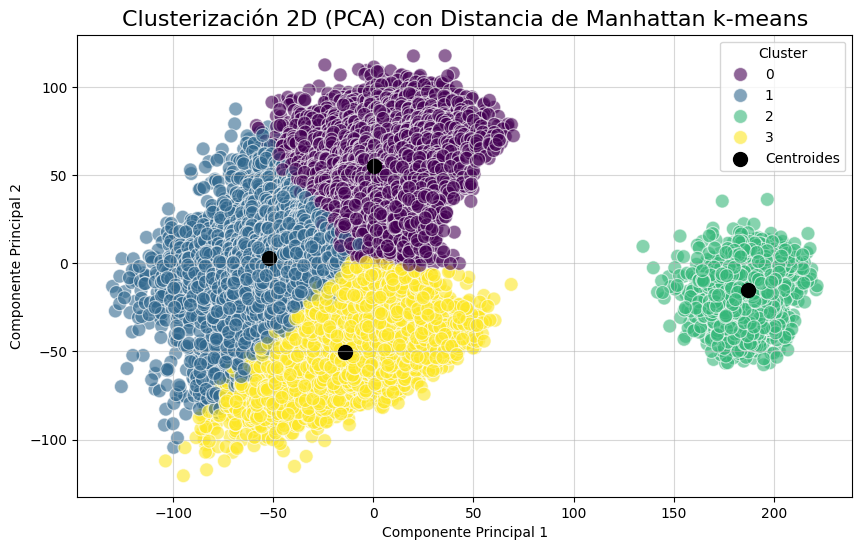

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def distancia_L1(x, c):
  return np.sum(np.abs(x - c))  # Suma de las diferencias absolutas

centroides_kmeans = kmeans.cluster_centers_
centroides_kmeans_pca = pca.transform(centroides_kmeans)  # Transformación de centroides

def graficar_clusters_PCA2D(clusters, metodo, centroids):
  plt.figure(figsize=(10, 6))
  # gráfico de dispersión de los datos transformados con PCA
  sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=clusters, palette='viridis', alpha=0.6, s=100)
  # graficar los centroides
  plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, label='Centroides')

  plt.title(f'Clusterización 2D (PCA) con Distancia de Manhattan {metodo}', fontsize=16)
  plt.xlabel('Componente Principal 1')
  plt.ylabel('Componente Principal 2')
  plt.grid(True)
  plt.grid(linestyle='-', alpha=0.5)
  plt.legend(title='Cluster')
  plt.show()


kmeans_2D = graficar_clusters_PCA2D(clusters, "k-means", centroides_kmeans_pca)

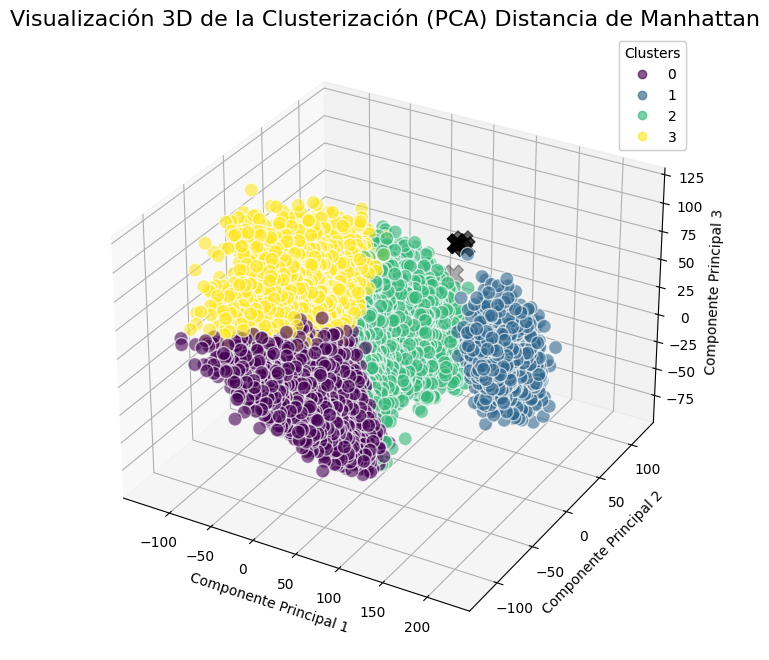

In [24]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

def distancia_L1(x, c):
    return np.sum(np.abs(x - c))

# inicialización de kmeans
k = 4  # # de clusters
dimension = x_.shape[0]
centroids = x_[random.sample(range(dimension), k)]  # centroides iniciales
clusters_manuales = np.zeros(dimension)  # etiquetas de clusters
distancias = np.zeros((dimension, k))  # almacenamiento de distancias
tolerancia = 1e-6
error = 100

# algoritmo de kmeans con distancia de Manhattan
while error > tolerancia:
    for i in range(dimension):  # Para cada fila (dato)
        for j in range(k):  # Para cada centroide
            distancias[i, j] = distancia_L1(x_[i], centroids[j])
        clusters_manuales[i] = np.argmin(distancias[i])

    centroids_prev = np.copy(centroids)  # guardar los centroides anteriores
    for l in range(k):  # para cada cluster
        puntos_cluster = x_[clusters_manuales == l]
        if len(puntos_cluster) > 0:
            centroids[l] = np.mean(puntos_cluster, axis=0)
        else:
            centroids[l] = x_[np.random.choice(dimension)]

    # calcular el error promedio en los centroides
    error = np.mean([distancia_L1(centroids[l], centroids_prev[l]) for l in range(k)])
# aplicar PCA para reducir a 3 componentes principales
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_)

def graficar_clusters_PCA3D(clusters, metodo):
    # crear el gráfico 3D
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111, projection='3d')

    # graficar los puntos con borde blanco
    scatter = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2],
                         c=clusters, cmap='viridis', s=100,
                         edgecolor='white', alpha=0.6)
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
            c='black', s=200, label='centroides', marker='X')

    ax.set_title(f'Visualización 3D de la Clusterización (PCA) {metodo}', fontsize=16)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    plt.show()
graficar_clusters_PCA3D(clusters_manuales, 'Distancia de Manhattan')